In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')

In [ ]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [ ]:
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
print(customers.duplicated().sum())

0


In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print(transactions.duplicated().sum())

0


In [ ]:
print(products.duplicated().sum())

0


In [ ]:
#merging datasets
merge_data=pd.merge(transactions,customers,on="CustomerID",how="inner")
merge_data=pd.merge(merge_data,products,on="ProductID",how="inner")
print(merge_data)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region SignupDate  \
0        300.68   300.68        Andrea Jenkins         Euro

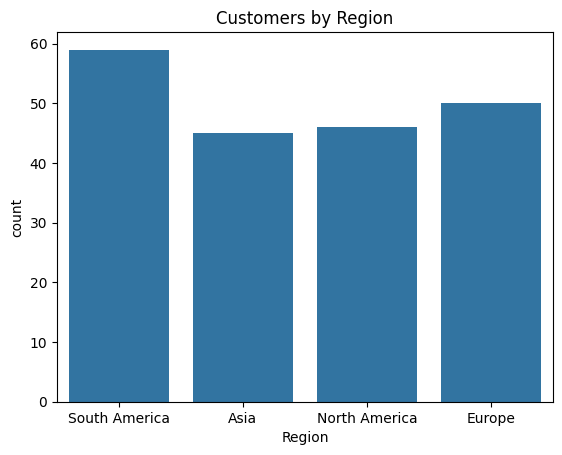

In [ ]:
sns.countplot(data=customers,x="Region")
plt.title("Customers by Region")
plt.show()

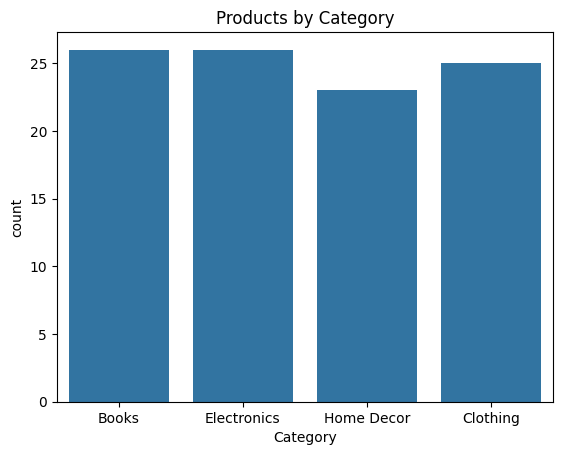

In [ ]:
sns.countplot(data=products,x="Category")
plt.title("Products by Category")
plt.show()

In [ ]:
merge_data['TransactionDate']=pd.to_datetime(merge_data['TransactionDate'],errors='coerce')
# monthly_sales=merge_data.groupby('TransactionDate')['Revenue'].sum()
print(merge_data['TransactionDate'])
print(merge_data['TransactionDate'].isnull().sum())

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]
0


In [ ]:
merge_data['TransactionMonth']=merge_data['TransactionDate'].dt.month
merge_data['TransactionYear']=merge_data['TransactionDate'].dt.year
monthly_sales=merge_data.groupby(['TransactionMonth'])['TotalValue'].sum()
print(monthly_sales)

TransactionMonth
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


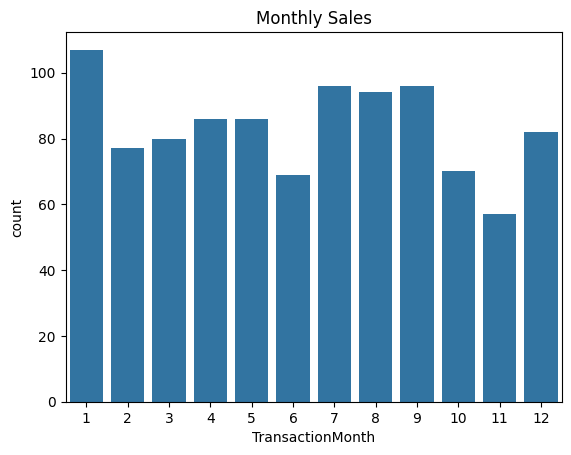

In [ ]:
sns.countplot(data=merge_data,x="TransactionMonth")
plt.title("Monthly Sales")
plt.show()

<ipython-input-16-702745512f72>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merge_data, x="ProductName", y="TotalValue", estimator=sum, ci=None, palette="viridis")
<ipython-input-16-702745512f72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merge_data, x="ProductName", y="TotalValue", estimator=sum, ci=None, palette="viridis")


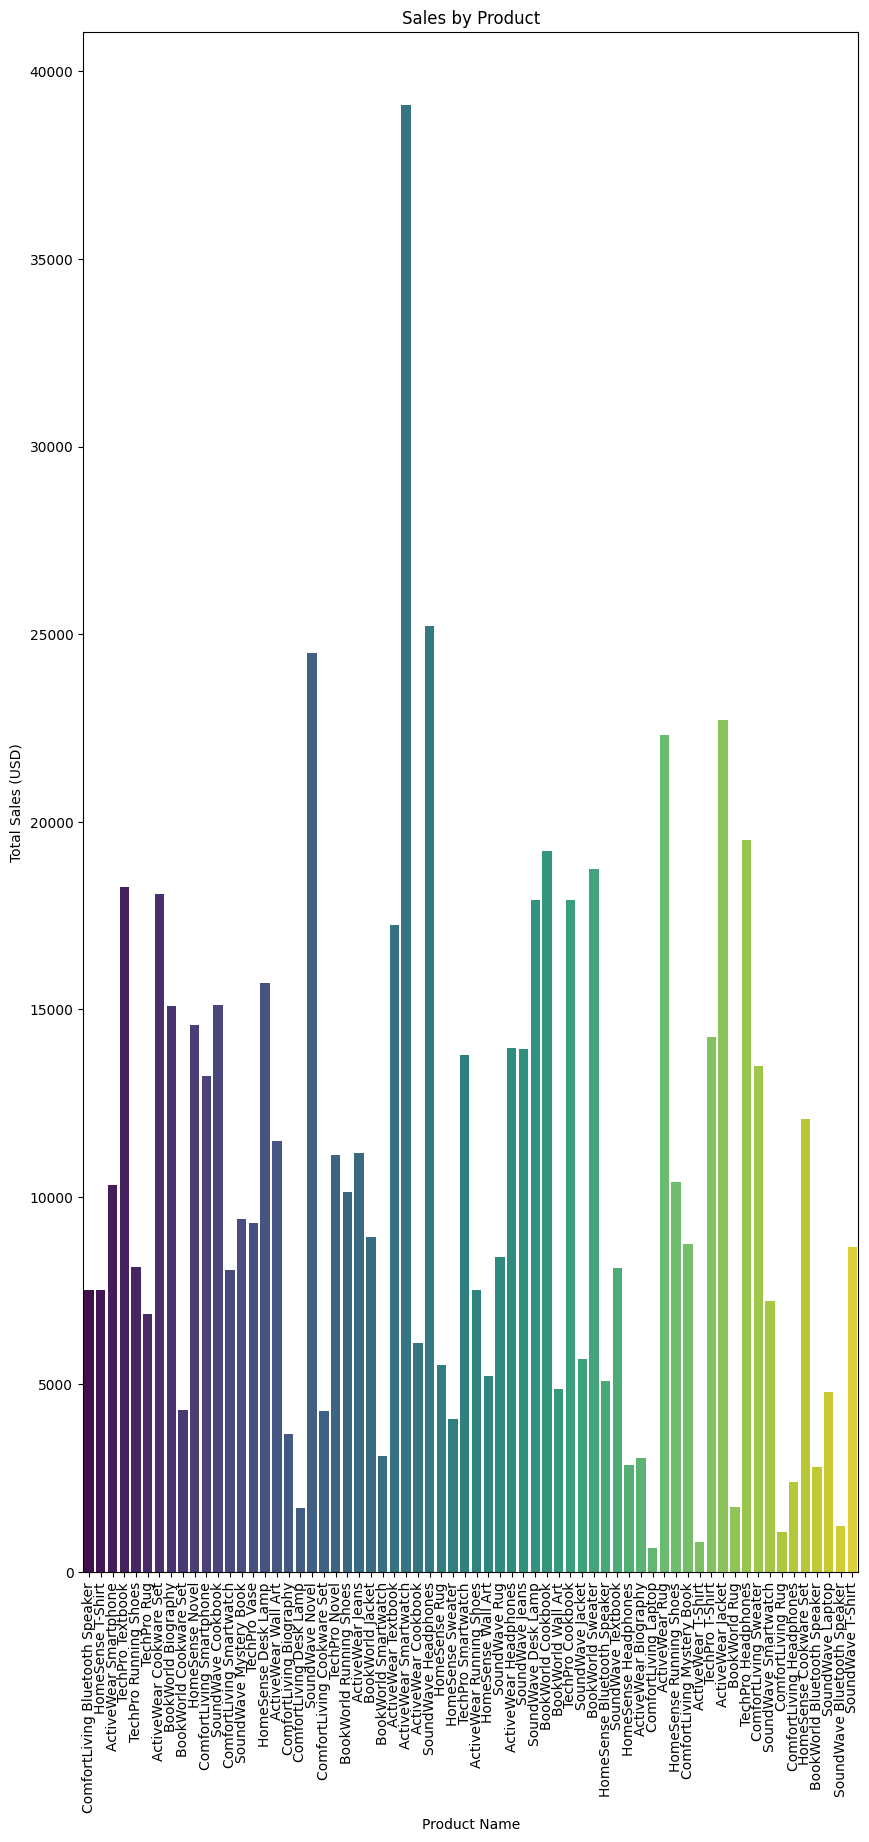

In [ ]:

# Set the figure size before plotting
plt.figure(figsize=(10, 20))

# Create the bar plot
sns.barplot(data=merge_data, x="ProductName", y="TotalValue", estimator=sum, ci=None, palette="viridis")

# Customize the plot
plt.title("Sales by Product")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.show()
